# Data transform examples
## Setup

In [1]:
import os
import pickle

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from cosmotools.power_spectrum_tools import pseudo_Pofk
from cosmotools.plotting import plot_power_spectrum, subplot_colorbar

from baryon_painter.utils.datasets import BAHAMASDataset
from baryon_painter.utils.data_transforms import create_split_scale_transform

pi = np.pi

## Split scale transform
Load data and get a single stack.

In [2]:
with open("../data/training_data/BAHAMAS/stacks_uncompressed/train_files_info.pickle", "rb") as f:
    training_files_info = pickle.load(f)


dataset = BAHAMASDataset(training_files_info, root_path="../data/training_data/BAHAMAS/stacks_uncompressed/",
                         transform=create_split_scale_transform(n_scale=2, step_size=8, include_original=True),
                        )

stack_idx = 13513
s, inv_transforms = dataset[stack_idx]


### Plots

Plot the original stack (scaled by the mean and then tanh scale), as well as the two different smoothing scales.

/Users/yooken/Research/xcorrtools/cosmotools/power_spectrum_tools.py:34: RuntimeWarning: invalid value encountered in sqrt
  k_grid = np.sqrt(sum(k**2 for k in k_mesh))


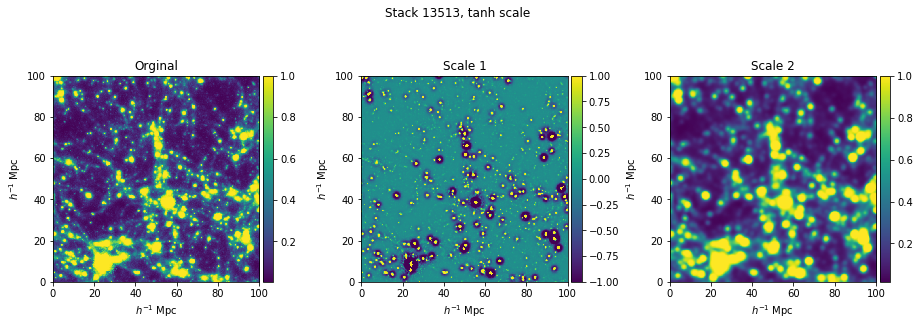

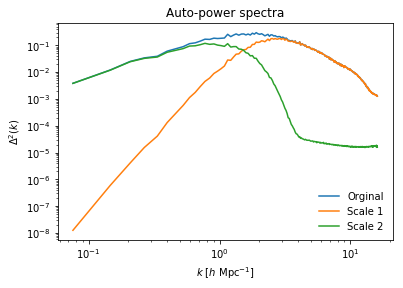

In [4]:
field_idx = 2
L = 100

fig, ax = plt.subplots(1, s[field_idx].shape[0], figsize=(15, 5))
fig.subplots_adjust(hspace=0, wspace=0.4)

for i, t in enumerate(s[field_idx]):
    im = ax[i].imshow(np.tanh(t/s[field_idx][0].mean()), origin="lower", extent=(0,L,0,L))
    subplot_colorbar(im, ax[i])
    ax[i].set_title(f"Scale {i}" if i > 0 else "Orginal")
    ax[i].set_xlabel(r"$h^{-1}$ Mpc")
    ax[i].set_ylabel(r"$h^{-1}$ Mpc")

fig.suptitle(f"Stack {stack_idx}, tanh scale")

fig, ax = plt.subplots(1, 1)
for i, m in enumerate(s[field_idx]):
    Pk, k, Pk_var, n_mode = pseudo_Pofk(m, m, L, 
                                        k_min=(2*pi)/L, 
                                        k_max=(2*pi)/L*m.shape[0]/2, 
                                        n_k_bin=m.shape[0]//2, 
                                        logspaced_k_bins=False,
                                        correct_pixel_window=False)
    
    label = f"Scale {i}" if i > 0 else "Orginal"
    plot_power_spectrum(ax, k, Pk, label=label,
                        dimensionless=True, n_dim=2, mode="pofk")

ax.set_title("Auto-power spectra")
ax.legend(frameon=False)